# *Graph-Sparse* Logistic Regression for sparse recovery of the dysregulated pathways in a synthetic dataset

In [1]:
%pylab inline
import sys
import pickle
import pandas as pd
import networkx as nx

# Use the following lines to test the basic functionality of the package if developing locally: 
import sys
sys.path.insert(0, "/Users/alex/Documents/OmicsIntegrator2/src")
from graph import *

# import OmicsIntegrator as oi

from matplotlib_venn import venn3, venn3_circles, venn2

repo_path = '/Users/alex/Documents/gslr/'
data_path = repo_path + 'experiments/generated_data/3/'
KEGG_path = repo_path + 'experiments/KEGG/KEGG_df.filtered.with_correlates.pickle'
interactome_path = repo_path + 'experiments/algorithms/pcsf/inbiomap_temp.tsv'

pathway_id = 'hsa04110'

Populating the interactive namespace from numpy and matplotlib


### I. Load Dataset

### *Index -> class label, column header -> gene symbol*

In [2]:
dataset = pd.read_csv(data_path + pathway_id + '_inbiomap_exp.csv', index_col=0)
dataset.head()

,ZNF91,NDEL1,ELAVL1,SUMO1,SUMO3,CHMP5,UBC,HTT,E2F4,ACP5,...,SPANXN4,ZNF605,SERPINB10,ANKAR,RRH,DHH,CYSLTR1,ZNF268,COL23A1,MEDAG
hsa04110,0.0,0.115272,-0.365345,-0.014955,-0.374350,0.109953,-0.0,-0.313725,0.034973,-0.309654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa04110,-0.0,-0.138520,-0.340004,0.430427,0.618810,-0.400398,-0.0,0.281479,-0.903482,0.312078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
negative,-0.0,-0.492418,0.612346,0.544840,-0.253648,-0.004268,-0.0,-0.109864,0.337787,-0.604446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa04110,-0.0,-0.592521,0.050179,0.383061,0.261450,-0.131206,0.0,-0.265055,0.179607,-0.416877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hsa04110,0.0,0.000973,0.040952,-0.728286,-0.604990,-0.119933,-0.0,-0.047649,0.165359,-0.616325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### II. Prepare interactome

In [3]:
graph = Graph(interactome_path, {'a':100000000})

04:14:19 - Graph: INFO - Duplicated edges in the interactome file (we'll keep the max cost):
04:14:19 - Graph: INFO - []


### III. Graph-Sparse Logistic Regression

In [4]:
class_networks, W_hat, losses = graph.gslr(dataset)

iteration 1:
  loss_cur = 0.69314718056   loss_next = 0.6558728895265322   step_size = 0.03
  loss_cur = 0.69314718056   loss_next = 0.5832360185074469   step_size = 0.1
  loss_cur = 0.69314718056   loss_next = 0.47237404694061635   step_size = 0.3
  best_step_size: 0.3
iteration 2:
  loss_cur = 0.472374046941   loss_next = 0.45349822329807   step_size = 0.03
  loss_cur = 0.472374046941   loss_next = 0.4559768452863489   step_size = 0.1
  loss_cur = 0.472374046941   loss_next = 1.8494143907986191   step_size = 0.3
  best_step_size: 0.03
iteration 3:
  loss_cur = 0.453498223298   loss_next = 0.4369090978948939   step_size = 0.03
  loss_cur = 0.453498223298   loss_next = 0.4294155985983895   step_size = 0.1
  loss_cur = 0.453498223298   loss_next = 1.4282870247172748   step_size = 0.3
  best_step_size: 0.1
iteration 4:
  loss_cur = 0.429415598598   loss_next = 0.39744703749061555   step_size = 0.03
  loss_cur = 0.429415598598   loss_next = 0.40255538538370045   step_size = 0.1
  loss_cur

/Users/alex/Documents/OmicsIntegrator2/src/graph.py:799: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  nx.set_node_attributes(nxgraph, subcellular.loc[list(nxgraph.nodes())].dropna(how='all').to_dict(orient='index'))


In [5]:
class_networks

In [6]:
get_networkx_graph_as_dataframe_of_nodes(class_networks[0])

,betweenness,degree,location,louvainClusters
ANAPC10,0.000602648,38,protein complex,2
ANAPC4,0.0133346,51,protein complex,2
APOA1,0.071422,87,extracellular,4
APOB,0.037485,47,extracellular,0
APOL1,0,3,extracellular,4
ARFGAP1,0.00903845,37,cytoplasm,0
ASB9,0.00354733,37,cytoplasm,5
ATR,0.00589234,88,nucleus,0
BUB1B,0.0214789,87,nucleus,2
C1QBP,0.0374093,222,extracellular,4


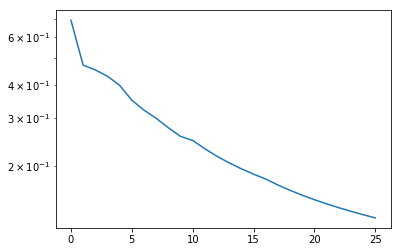

In [8]:
plt.plot(losses)
plt.yscale('log')